<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Iris_Dataset_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [71]:
df = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [72]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [75]:
for col in df.columns:
  a=df[col].unique()
  print(col,a)

sepal_length [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal_width [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal_length [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal_width [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
target ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [76]:
df.duplicated().sum()

np.int64(3)

In [77]:
df.drop_duplicates(inplace = True)

In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   target        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


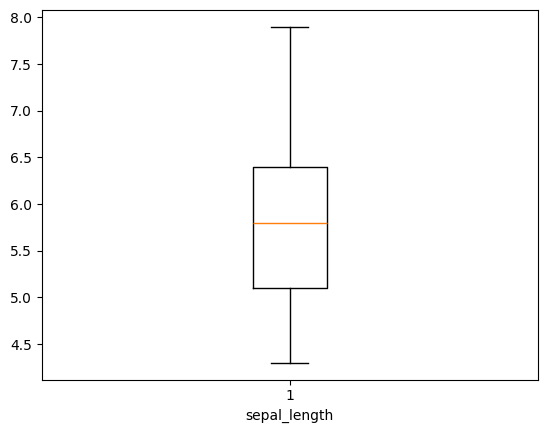

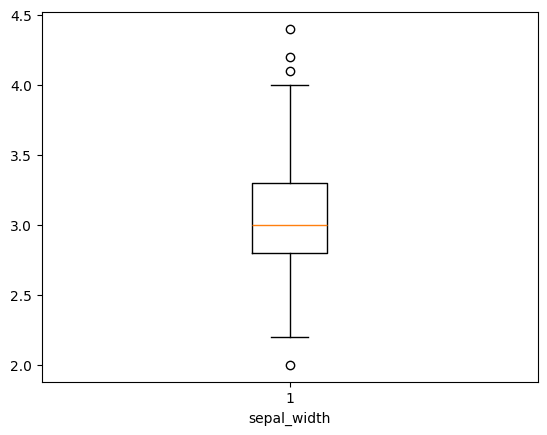

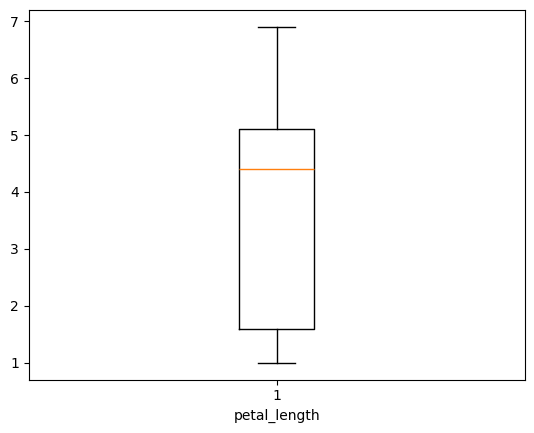

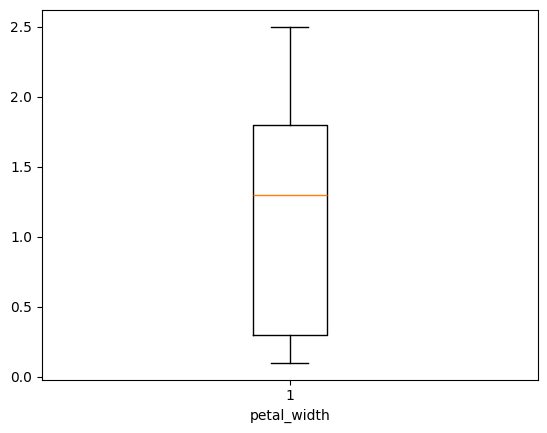

In [81]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(data = df, x = col)
    plt.xlabel(col)
    plt.show()

* No need to remove outliers.
* Features (sepal/petal length/width) are small, smooth, and well-behaved; extreme values are rare and typically genuine, not errors.

In [82]:
df.target.value_counts()

,count
target,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


In [83]:
from sklearn import discriminant_analysis
# machine learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

In [84]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
x = df.drop(columns = 'target', axis= 1)
y = df['target']

In [86]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 100, stratify = y)

In [88]:
print(f'Training Size (70%) : {x_train.shape[0]}')
print(f'testing Size (30%): {x_test.shape[0]}')

Training Size (70%) : 102
testing Size (30%): 45


In [89]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components= 2))
    ])

In [90]:
x_train_pca = pca_pipeline.fit_transform(x_train)
x_test_pca = pca_pipeline.transform(x_test)

In [91]:
#Explained variance ratio
pca_explained_var = pca_pipeline.named_steps['pca'].explained_variance_ratio_
Total_var_exp = sum(pca_explained_var)*100
print(f"\nPCA Explained varinace ratio : {pca_explained_var}")
print(f"Total Variance explained : {Total_var_exp : .2f}")
print(f"Total Loss after DIMENSION Reduction : {(100 - Total_var_exp):.2f}")


PCA Explained varinace ratio : [0.73676172 0.22027246]
Total Variance explained :  95.70
Total Loss after DIMENSION Reduction : 4.30


In [92]:
log_model = LogisticRegression(max_iter=100)
RF_model =  RandomForestClassifier( random_state = 42)


In [93]:
print('Before PCA Model building')
for model in [log_model, RF_model]:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)
  accuracy = accuracy_score(y_test,y_pred)*100
  print(model, accuracy)

Before PCA Model building
LogisticRegression() 95.55555555555556
RandomForestClassifier(random_state=42) 93.33333333333333


In [94]:
print('After PCA Model building')
for model in [log_model, RF_model]:
  model.fit(x_train_pca, y_train)
  lr_pred = model.predict(x_test_pca)
  y_pred_proba = model.predict_proba(x_test_pca)
  accuracy = accuracy_score(y_test,lr_pred)*100
  lr_pred_proba = model.predict_proba(x_test_pca)[:,1]
  print(model, accuracy)


After PCA Model building
LogisticRegression() 88.88888888888889
RandomForestClassifier(random_state=42) 91.11111111111111


In [95]:
pd.DataFrame({'Actual' : y_test,
              'Predicted' : lr_pred})

,Actual,Predicted
35,Iris-setosa,Iris-setosa
95,Iris-versicolor,Iris-versicolor
8,Iris-setosa,Iris-setosa
140,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
125,Iris-virginica,Iris-virginica
58,Iris-versicolor,Iris-virginica
94,Iris-versicolor,Iris-versicolor
99,Iris-versicolor,Iris-versicolor
10,Iris-setosa,Iris-setosa


In [96]:
pca_df = pd.DataFrame(data = x_train_pca, columns = ['PC1','PC2'])
pca_df['target'] = y_train.values


In [97]:
pca_df

,PC1,PC2,target
0,-1.993640,1.412188,Iris-setosa
1,2.199620,2.705903,Iris-virginica
2,0.422717,-1.876931,Iris-versicolor
3,-2.461557,-0.990985,Iris-setosa
4,1.000568,0.498564,Iris-versicolor
...,...,...,...
97,1.317243,0.303032,Iris-versicolor
98,2.320776,2.643370,Iris-virginica
99,0.608845,-0.478099,Iris-versicolor
100,1.149900,-0.366464,Iris-virginica


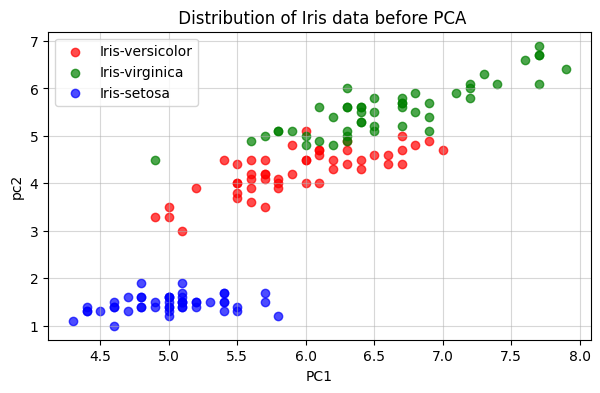

In [98]:
targets = ['Iris-versicolor','Iris-virginica','Iris-setosa']
colors = ['red', 'green', 'blue']

plt.figure(figsize = (7,4))
for target,color in zip(targets,colors):
  indices = df[df['target']== target]
  plt.scatter(x = indices['sepal_length'], y = indices['petal_length'], color = color, label = target, alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('pc2')
plt.legend()
plt.title(' Distribution of Iris data before PCA' )
plt.grid(alpha = 0.5)
plt.show()

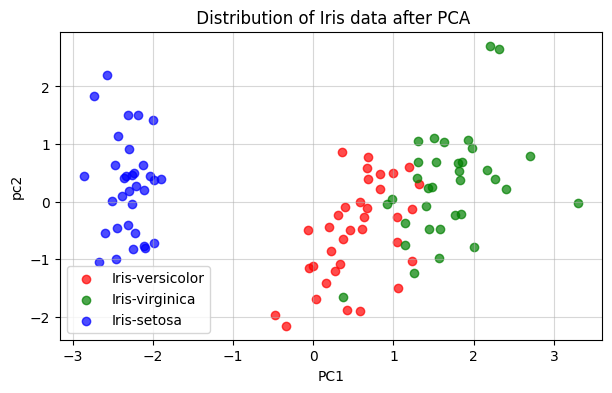

In [99]:
targets = ['Iris-versicolor','Iris-virginica','Iris-setosa']
colors = ['red', 'green', 'blue']

plt.figure(figsize = (7,4))
for target,color in zip(targets,colors):
  indices = pca_df[pca_df['target']== target]
  plt.scatter(x = indices['PC1'], y = indices['PC2'], color = color, label = target, alpha = 0.7)
plt.xlabel('PC1')
plt.ylabel('pc2')
plt.legend()
plt.title(' Distribution of Iris data after PCA' )
plt.grid(alpha = 0.5)
plt.show()



In [100]:
print(f'classification_report for PCA : \n{classification_report(y_test,lr_pred)}')

classification_report for PCA : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      0.87      0.87        15
 Iris-virginica       0.87      0.87      0.87        15

       accuracy                           0.91        45
      macro avg       0.91      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lr_pred_encoded = le.fit_transform(lr_pred)
lr_pred_encoded


array([0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1,
       2])

In [102]:
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (weighted, ovr): {auc_score:.2f}")

ROC AUC Score (weighted, ovr): 0.98


In [103]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [104]:
lda = LinearDiscriminantAnalysis()

In [105]:
x_train_lda = lda.fit_transform(x_train_scaled,y_train)
x_test_lda = lda.transform(x_test_scaled)


In [106]:
x_test_lda.shape

(45, 2)

In [107]:
RF_lda_model = RandomForestClassifier(random_state=42)
RF_lda_model.fit(x_train_lda,y_train) # Corrected from .fit_transform() to .fit()
y_pred_lda = RF_lda_model.predict(x_test_lda)
print(f"Accuracy for RandomForest (LDA): {accuracy_score(y_test,y_pred_lda)*100:.2f}%") # Corrected to accuracy_score and added print

Accuracy for RandomForest (LDA): 93.33%


In [108]:
pca_df.keys()

Index(['PC1', 'PC2', 'target'], dtype='object')

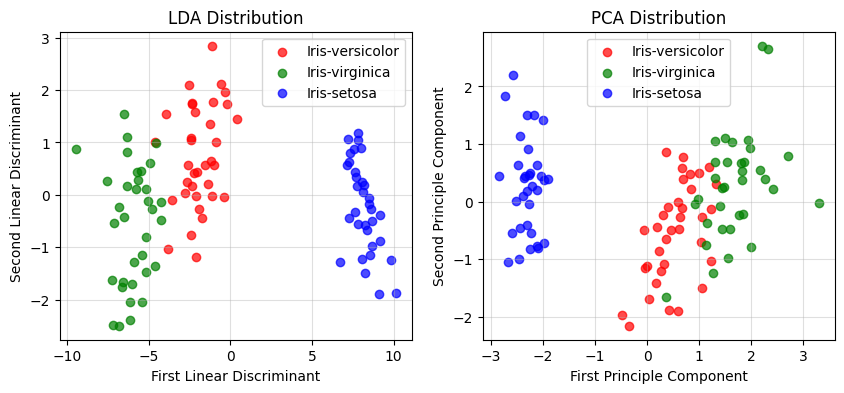

In [109]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize= (10,4))
for target, color in zip(targets, colors) :
  indices = y_train == target
  ax1.scatter(x_train_lda[indices,0], x_train_lda[indices,1], color = color, label = target,  alpha = 0.7)
ax1.set_xlabel("First Linear Discriminant")
ax1.set_ylabel("Second Linear Discriminant")
ax1.grid(alpha = 0.4)
ax1.set_title('LDA Distribution')
ax1.legend()

for target, color in zip(targets,colors):
  indices = pca_df[pca_df['target']== target]
  plt.scatter(x = indices['PC1'], y = indices['PC2'], color = color, label = target, alpha = 0.7)
ax2.set_xlabel('First Principle Component')
ax2.set_ylabel('Second Principle Component')
ax2.grid(alpha = 0.4)
ax2.set_title('PCA Distribution')
ax2.legend()
plt.show()

In [110]:
print(f' Classification report for LDA : \n{classification_report(y_test,y_pred_lda)}')

 Classification report for LDA : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [118]:
#cross validarion with pca
pca_lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('lr',LogisticRegression(max_iter=1000, random_state=42))
])

cv_scores_ = cross_val_score(pca_lr_pipeline, x_train, y_train, cv=skf)
print(f"PCA + LOG REG With CV : {cv_scores_}")

PCA + LOG REG With CV : [0.95238095 0.9047619  0.9        0.85       1.        ]


In [119]:
#cross validarion with LDA
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state= 42)
lda_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis()),
    ('log_model', LogisticRegression(max_iter=150, random_state=42))
])

cv_scores = cross_val_score(lda_pipeline, x_train,y_train, cv= skf)

In [120]:
print(f"LDA + LOG REG With CV : {cv_scores}")

LDA + LOG REG With CV : [1.   1.   1.   0.9  0.95]
